# Analyzing House Sales in King County: A Multiple Linear Regression Approach

![King County.jpg](<attachment:King County.jpg>)
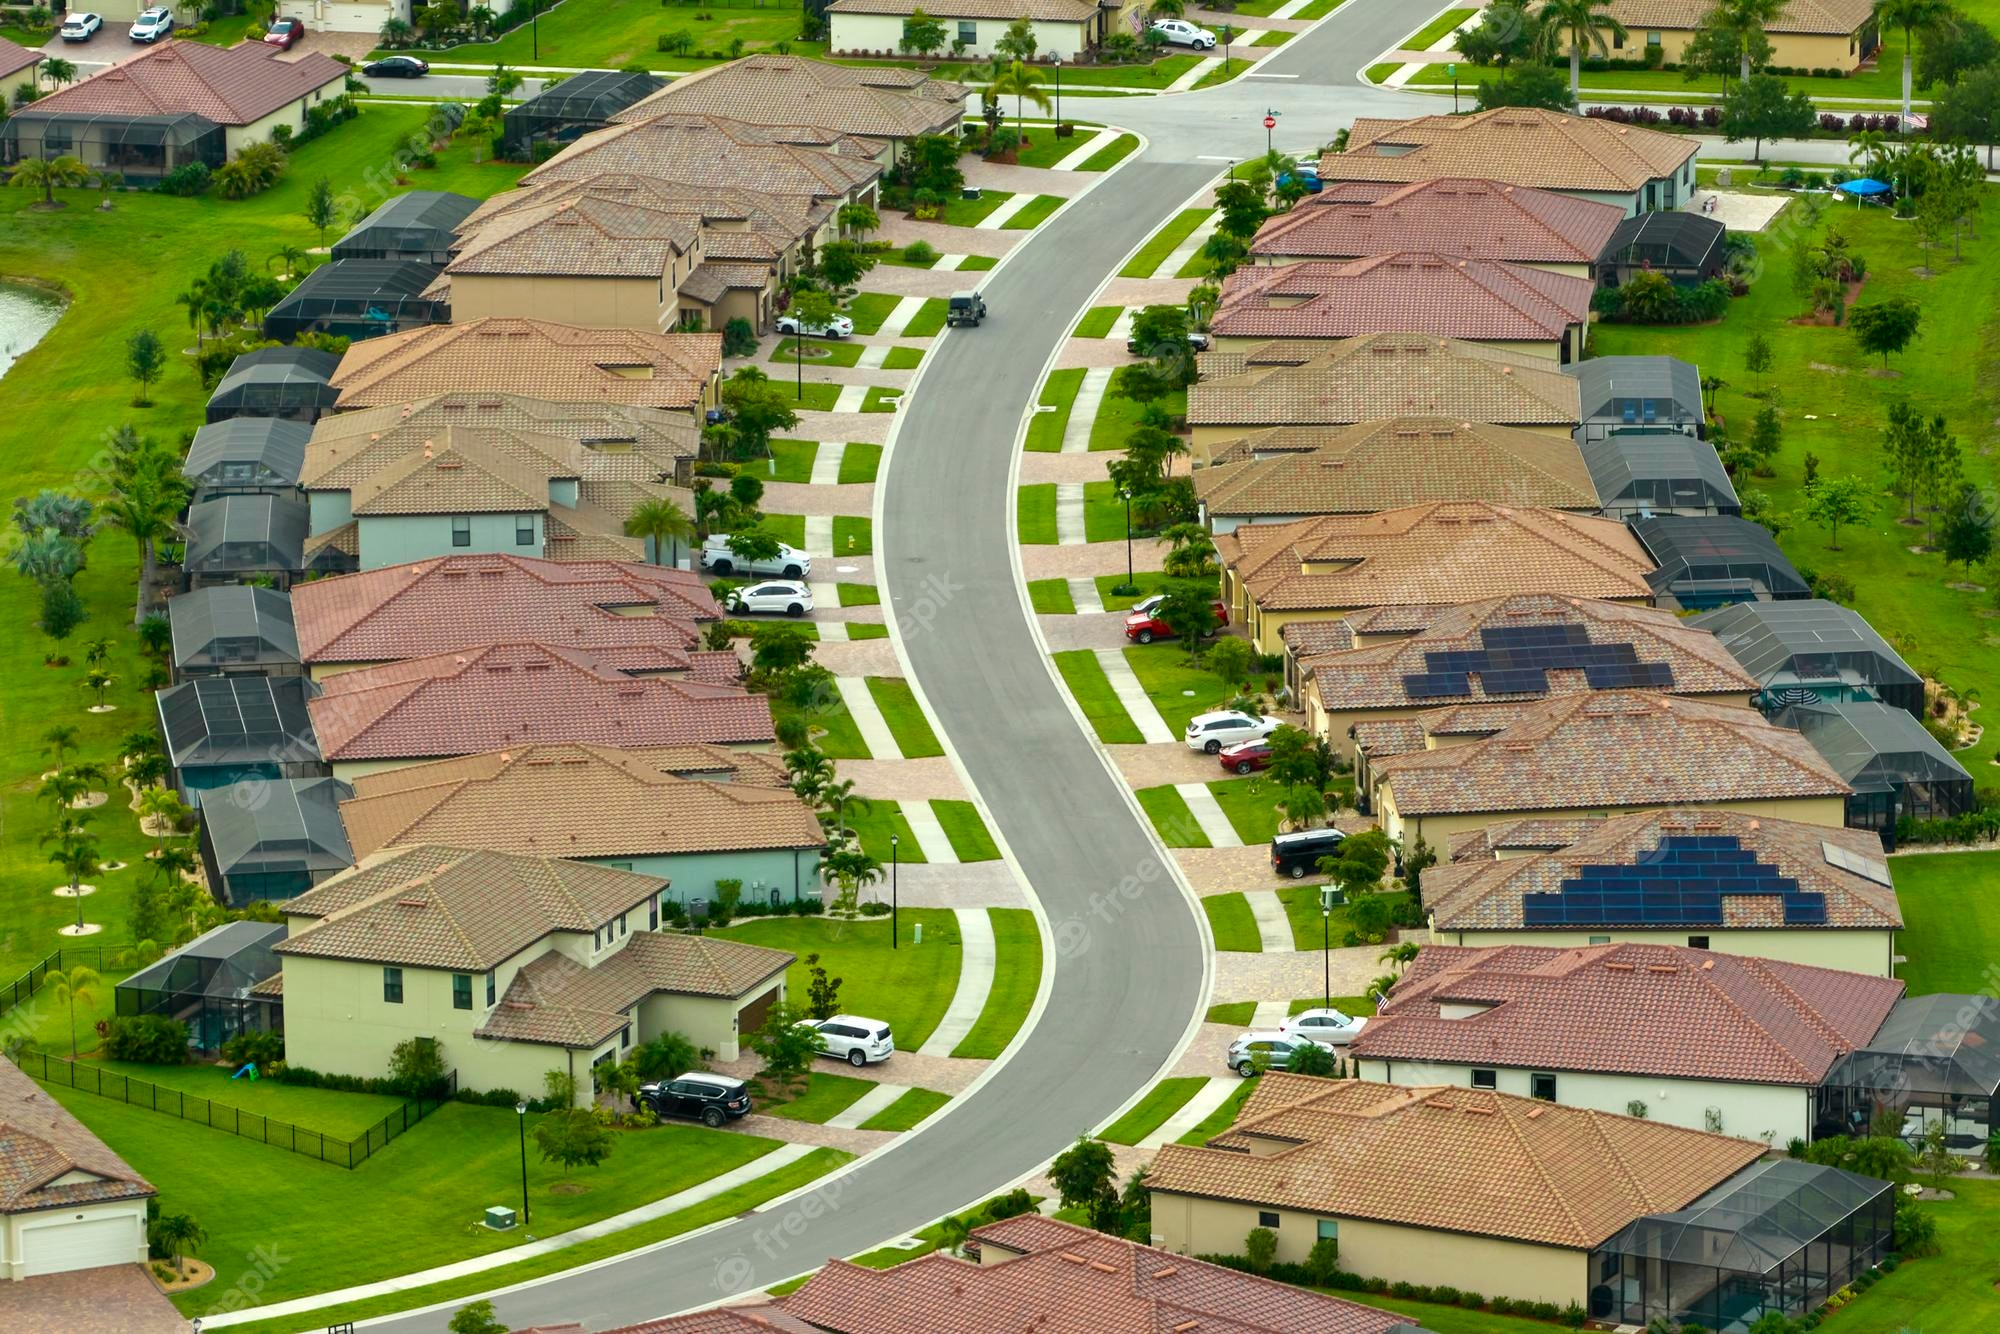

## Overview
Nyika Developers, a reputable and customer-centric real estate agency, has recognized the importance of empowering homeowners with accurate and data-driven insights about the potential impact of home renovations on the estimated value of their properties. As homeowners strive to maximize the value of their homes before selling or seek long-term investment opportunities, the need for informed guidance becomes paramount. Therefore, Nyika Developers has commissioned this project to analyze house sales in King County using multiple linear regression modelling.

The utilization of multiple linear regression modelling allows for a comprehensive examination of various factors that influence the sale prices of houses. By identifying the relationships between these factors and the sale prices, Nyika Developers can offer valuable advice to homeowners, enabling them to make informed decisions regarding home renovations and their potential financial benefits.

## Statement of the Problem
The real estate market is a dynamic and complex domain, where homeowners constantly seek ways to enhance the value of their properties. In this context, Nyika Developers, a reputable real estate agency, faces the challenge of providing accurate and data-driven advice to homeowners regarding the potential impact of home renovations on the estimated value of their properties. The lack of comprehensive insights in this regard hinders homeowners from making informed decisions, optimizing their investments, and maximizing the financial gains from their properties.

Addressing these challenges requires a comprehensive analysis of house sales data in King county, utilizing multiple linear regression modelling. By adopting this data-driven approach, Nyika Developers aim to achieve two primary objectives:

- Identify the Features with the Greatest Impact on Sale Price:
Nyika Developers seek to uncover the key attributes that significantly influence the sale price of a house. By analyzing a comprehensive dataset of past home sales in King County, they aim to determine which features have the most substantial impact on property values. This knowledge will enable them to prioritize their investments and focus on incorporating features that add the most value to the homes they build. By understanding the features that appeal to buyers and drive higher sale prices, Nyika Developers can optimize their construction plans and increase profitability.

- Assess the Impact of Location on Sale Price:
The location of a property is a crucial factor that plays a significant role in determining its value. Nyika Developers recognize the importance of understanding how different neighborhoods, amenities, schools, transportation, and other location-related factors influence the sale price. By analyzing the dataset, they aim to quantify the impact of location on property values in King County. This knowledge will guide them in making informed decisions about the areas where they should invest and develop properties to maximize profitability.

By training the model on historical sales data, Nyika Developers can uncover patterns and relationships between various attributes and their corresponding sale prices. The resulting model will serve as a powerful tool to guide in accurately pricing properties, setting competitive prices that align with market demand, and ultimately maximizing profitability.

## Data Understanding
For this project, we are utilizing two primary datasets to analyze house sales in a northwestern county and provide insights on home renovations. The first dataset is the King County house sales data obtained from the King County government website. This dataset contains information about individual homes within King County, including features like price, square footage, address, and other relevant details.

This data is a dataset of house sales in King County, Washington. The dictionary below explains the meaning of each column:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * The [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) has further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * The [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) has further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')

The data files were opened to gain a preliminary understanding of their contents and structure, providing insights into the datasets and their potential relevance in achieving stated objectives. By examining the data frames, available information can be assessed to determine how it can contribute to the goal. This initial exploration allows for familiarization with the data, enabling for making of informed decisions on how to utilize it effectively to address research questions and drive towards desired outcomes.

In [2]:
# Opening the sales data
data = pd.read_csv('data/kc_house_data.csv')

# Looking at first five rows
data.head()

id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0            0.0     1955           0.0    98178  47.5112 -122.257  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

We begin by defining functions for the following tasks:
- Getting the shape of the data
- Getting data info
- Checking for missing data
- Checking for duplicates
- Checking for descriptive stats

We then group together the function under a new function that explores the data for the listed attributes.

In [3]:
# Shape of the data 
def data_shape(data):
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [4]:
# Info of the data 
def data_info(data):
    out = print(data.info(), '\n')
    
    return out

In [5]:
# Missing values

def data_missing(data):
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [6]:
# Duplicates

def identify_duplicates(data):
    # Identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # Empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # Identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # Percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [7]:
# Duplicates on the ID column

def unique_column_duplicates(data, column):
    # Empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # Identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # Percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [8]:
# Descriptive stats
def data_describe(data):
    out = print(data.describe(), '\n')
    
    return out

In [9]:
# Data understanding
def explore(data):
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

explore(data)

The DataFrame has:
	* 21597 rows
	* 21 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  l

(None, None, None, None, None)

The data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. e.g. having max 33 bedrooms

Looking at the `date` column which shows sale date, we will extract the month to see if there is a seasonality sale of houses i.e do houses sale more during some months than others?

We will also use the `zipcode` or `lat` & `long` columns to split the locations into the 4 regions of King County namely : North, East, Seattle & South. We will use this to investigate whether location is a factor in house sales i.e. is there a variation in house prices by location?

## Data Preparation

In [10]:
# Changing floors from float to int
data['floors'] = data['floors'].astype(int)

#### Cleaning date column
Here we will change the `date` column to string, and then create a new column `month_sold` extracting the sale month from the date column. To simplify analysis, we will group the month column into 4 quarters: Q1 (1, 2, 3), Q2 (4, 5, 6), Q3 (7, 8, 9), Q4 (10, 11, 12)

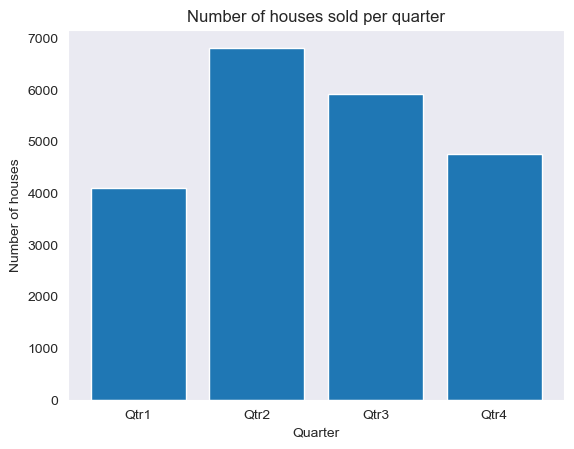

In [11]:
# Transform and extract month
data['date'] = pd.to_datetime(data['date'])
data['month_sold'] = data.date.dt.month

# Change month to quarters
Q1 = {1: 'Qtr1', 2: 'Qtr1', 3: 'Qtr1'}
Q2 = {4: 'Qtr2', 5: 'Qtr2', 6: 'Qtr2'}
Q3 = {7: 'Qtr3', 8: 'Qtr3', 9: 'Qtr3'}
Q4 = {10: 'Qtr4', 11: 'Qtr4', 12: 'Qtr4'}
quarters = {**Q1, **Q2, **Q3, **Q4}
data['month_sold'] = data['month_sold'].replace(quarters)

a = data.month_sold.value_counts().sort_index()
plt.bar(x=a.index, height=a.values)
plt.xticks(a.index)
plt.title('Number of houses sold per quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of houses');

From the plot, we see that there is a seasonality trend to house sales.


#### Cleaning sqft_basement column
This column is coded as string, yet it should be float. We first need to change that.

In [12]:
# inspect columns
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')
a1 = data.sqft_basement.value_counts(normalize=True)[1]

def check_qn(data):
    """check for ? in data"""
    for col in data.columns:
        if ('?' in data[col].unique()) == True:
            out = print(f'{col} contains "?". This is {round(a1*100, 2)}% of the data')
            return out
        
check_qn(data)

sqft_basement col is encoded as object
sqft_basement contains "?". This is 2.1% of the data


The column contains missing values encoded as '?'. Since this accounts for only 2.1% of the data, we can drop them.

In [13]:
# Dropping missing values
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'].replace('?', np.nan))
data = data.dropna(subset=['sqft_basement'])

# check again for ?
print('"?" in sqft_basement: ','?' in data['sqft_basement'].unique())

#check dtype
print(f'sqft_basement col is encoded as {data.sqft_basement.dtype}')

"?" in sqft_basement:  False
sqft_basement col is encoded as float64


#### Missing values
We have missing values. However, since these columns will not be used in the analysis, we will not treat the missing data as the columns will be dropped later on.

In [14]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(data)
missing_data

Missing Values  Percentage(%)
yr_renovated            3754      17.755285
waterfront              2339      11.062763
view                      61       0.288512

In [15]:

# Filling missing values
def fill_missing_values(data):
    # Fill missing values in "view" with "NONE"
    data["view"].fillna("NONE", inplace=True)

    # Fill missing values in "waterfront" with mode
    mode_waterfront = data["waterfront"].mode()[0]
    data["waterfront"].fillna(mode_waterfront, inplace=True)

    # Fill missing values in "yr_renovated" with mode
    mode_yr_renovated = data["yr_renovated"].mode()[0]
    data["yr_renovated"].fillna(mode_yr_renovated, inplace=True)

    return data

fill_missing_values(data)

id       date     price  bedrooms  bathrooms  sqft_living   
0      7129300520 2014-10-13  221900.0         3       1.00         1180  \
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ... sqft_above sqft_basement   
0          5650       1         NO  NONE  ...       1180           0.0  \
1          7242       2         NO  NONE  ...       2170         400.0   
2         10000       1         NO  NONE  ...        770           0.0   
3          5000       1         NO  NONE  ...       1050         910.0   
4          8080       1         NO  NONE  ...       1680           0.0   
...         ...     ...        ...   ...  ...        ...           ...   
21592      1131       3         NO  NONE  ...       1530           0.0   
21593      5813       2         NO  NONE  ...       2310           0.0   
21594      1350       2         NO  NONE  ...       1020           0.0   
21595      2388       2         NO  NONE  ...       1600           0.0   
21596      1076       2         NO  NONE  ...       1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0          1955           0.0    98178  47.5112 -122.257           1340  \
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  month_sold  
0            5650        Qtr4  
1            7639        Qtr4  
2            8062        Qtr1  
3            5000        Qtr4  
4            7503        Qtr1  
...           ...         ...  
21592        1509        Qtr2  
21593        7200        Qtr1  
21594        2007        Qtr2  
21595        1287        Qtr1  
21596        1357        Qtr4  

[21143 rows x 22 columns]

In [16]:
missing_values(data)

Empty DataFrame
Columns: [Missing Values, Percentage(%)]
Index: []

The missing values have been handled.
#### Duplicated Id Column
Id column duplicates to be dropped in below

In [17]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id'))

The Data has no duplicates 

None
The column Id has 173 duplicated rows.
This constitutes 0.818% of the data set. 

None


In [18]:
def drop_duplicates(df, column):
    """function to drop duplicated rows"""
    
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id')

The column Id has no duplicates 



#### Outliers
We will focus on the columns specified below, which we have chosen for the modelling, to check for outliers.

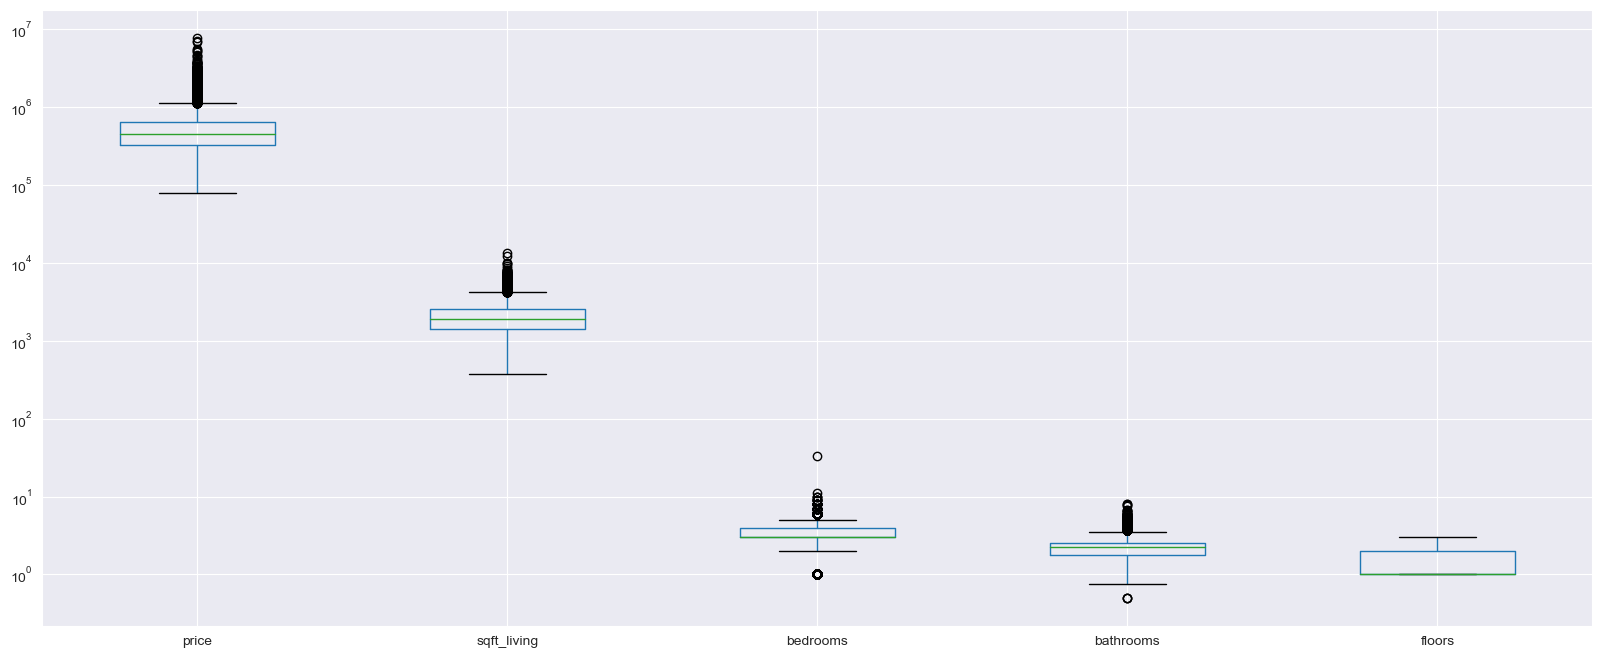

In [19]:
# Visualizing data to assess outliers
columns = ['price', 'sqft_living', 'bedrooms','bathrooms', 'floors']
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [20]:
# Defining the columns to check for outliers
columns = ['bedrooms', 'bathrooms', 'price', 'sqft_living', 'floors']

print("Summary statistics before removing outliers:")
print(data[columns].describe())

# Calculating the IQR for each column
Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from each column
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  20970.000000  20970.000000  2.097000e+04  20970.000000  20970.000000
mean       3.373343      2.118693  5.409766e+05   2083.747592      1.447639
std        0.924136      0.768475  3.686345e+05    919.294297      0.551640
min        1.000000      0.500000  7.800000e+04    370.000000      1.000000
25%        3.000000      1.750000  3.225000e+05   1430.000000      1.000000
50%        3.000000      2.250000  4.500000e+05   1920.000000      1.000000
75%        4.000000      2.500000  6.450000e+05   2550.000000      2.000000
max       33.000000      8.000000  7.700000e+06  13540.000000      3.000000

Summary statistics after removing outliers:
           bedrooms     bathrooms         price   sqft_living        floors
count  19106.000000  19106.000000  1.910600e+04  19106.000000  19106.000000
mean       3.298440      2.026052  4.715314e+05   1943.632262      1.42609

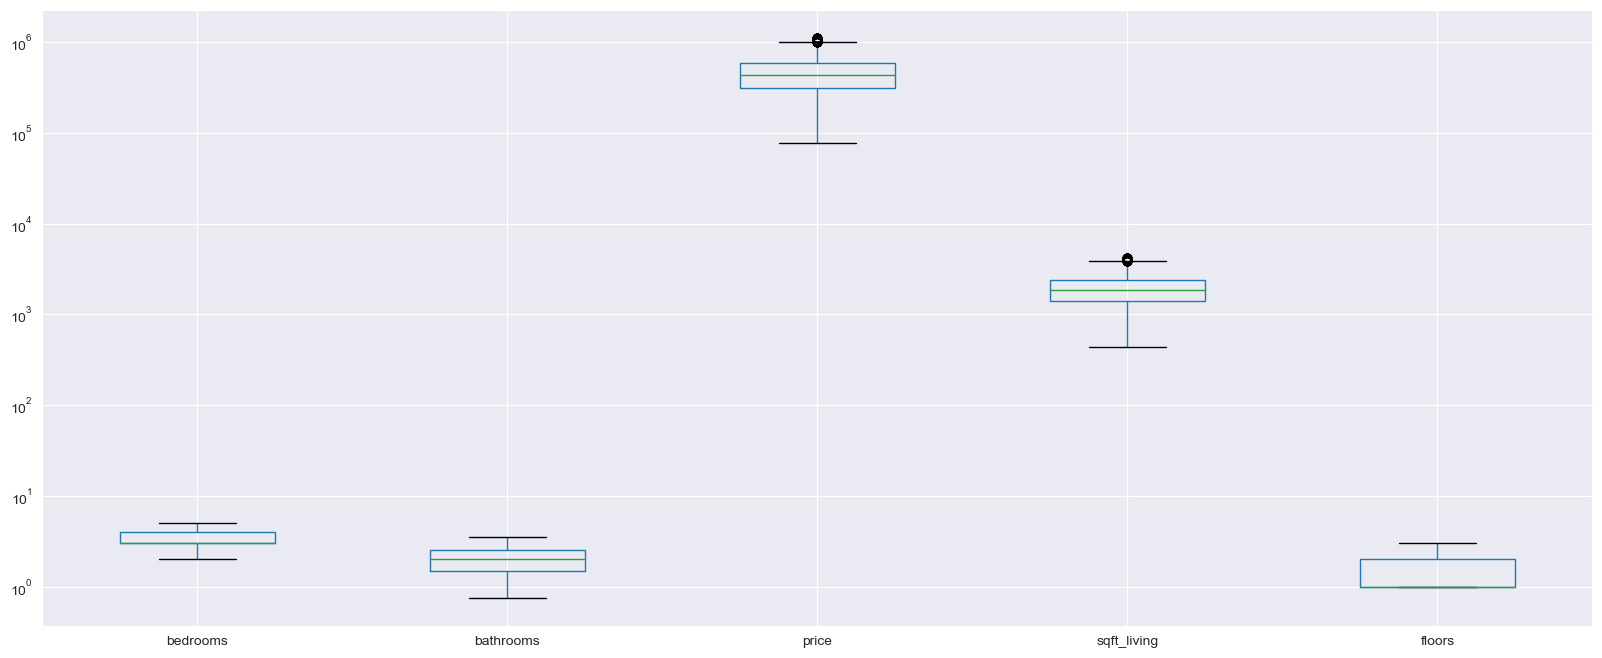

In [21]:
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

### Turning Zipcodes into Regions
The code below turns zip codes into the regions for King County. 

In [22]:
# Determining the minimum and maximum latitude and longitude values in the dataset
min_lat = data['lat'].min()
max_lat = data['lat'].max()
min_long = data['long'].min()
max_long = data['long'].max()

# Defining the latitude and longitude ranges for each of the four regions
north_lat = max_lat - (max_lat - min_lat) / 2
east_long = min_long + (max_long - min_long) / 2
south_lat = min_lat + (max_lat - min_lat) / 2

# Assigning each data point to one of the four regions based on its latitude and longitude values
data['region'] = ''
data.loc[(data['lat'] >= north_lat) & (data['long'] <= east_long), 'region'] = 'Northwest'
data.loc[(data['lat'] >= north_lat) & (data['long'] > east_long), 'region'] = 'Northeast'
data.loc[(data['lat'] < south_lat) & (data['long'] <= east_long), 'region'] = 'Southwest'
data.loc[(data['lat'] < south_lat) & (data['long'] > east_long), 'region'] = 'Southeast'

### Folium map

In [23]:
# Visualizing the different regions
import folium
from IPython.display import display
from folium.plugins import MarkerCluster

# Creating a list of coordinates
latlon = list(zip(data.lat, data.long))

# Creating a map with the Stamen Terrain tileset
base_map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=9, tiles='Stamen Terrain')

# Adding the markers to the map
marker_cluster = MarkerCluster().add_to(base_map)
for coord in latlon:
    folium.Marker(location=[coord[0], coord[1]], icon=None).add_to(marker_cluster)
display(base_map)

## Explolatory Data Analysis
To set context for the presentation, the following areas will be explored:
- Average price of property based on number of bedrooms
- Average price of property based on the condition of the property
- Regions (North, East, Seattle & South)
- Price distribution
- Houses sold per quarter
